In [ ]:
import numpy as np
import pandas as pd
import gymnasium as gym
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
import tqdm

In [ ]:
def plot_policy(action_values, frame=None, action_meanings=None):
    """
    Plot the policy for FrozenLake 4x4 environment.

    Args:
        action_values: (16, 4) array of Q-values
        frame: optional rendered frame to display alongside policy
        action_meanings: dict mapping action indices to symbols
    """
    if action_meanings is None:
        action_meanings = {0: '←', 1: '↓', 2: '→', 3: '↑'}

    # Reshape to 4x4 grid
    q_values_grid = action_values.reshape(4, 4, 4)

    # Get best actions
    max_prob_actions = q_values_grid.argmax(axis=-1)
    probs_copy = max_prob_actions.copy().astype(object)

    for key in action_meanings:
        probs_copy[probs_copy == key] = action_meanings[key]

    if frame is not None:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.heatmap(max_prob_actions, annot=probs_copy, fmt='', cbar=False,
                    cmap='coolwarm', annot_kws={'weight': 'bold', 'size': 16},
                    linewidths=2, ax=axes[0])
        axes[1].imshow(frame)
        axes[0].axis('off')
        axes[1].axis('off')
        plt.suptitle("Policy", size=18)
    else:
        fig, ax = plt.subplots(figsize=(6, 6))
        sns.heatmap(max_prob_actions, annot=probs_copy, fmt='', cbar=False,
                    cmap='coolwarm', annot_kws={'weight': 'bold', 'size': 16},
                    linewidths=2, ax=ax)
        ax.axis('off')
        plt.title("Policy", size=18)

    plt.tight_layout()
    plt.show()


def plot_values(action_values, frame=None):
    """
    Plot state values V(s) = max_a Q(s,a) for FrozenLake.

    Args:
        action_values: (16, 4) array of Q-values
        frame: optional rendered frame to display alongside values
    """
    # Compute state values
    state_values = action_values.max(axis=-1).reshape(4, 4)

    if frame is not None:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.heatmap(state_values, annot=True, fmt=".2f", cmap='coolwarm',
                    annot_kws={'weight': 'bold', 'size': 12}, linewidths=2,
                    ax=axes[0])
        axes[1].imshow(frame)
        axes[0].axis('off')
        axes[1].axis('off')
        plt.suptitle("State Values", size=18)
    else:
        fig, ax = plt.subplots(figsize=(6, 6))
        sns.heatmap(state_values, annot=True, fmt=".2f", cmap='coolwarm',
                    annot_kws={'weight': 'bold', 'size': 12}, linewidths=2,
                    ax=ax)
        ax.axis('off')
        plt.title("State Values V(s)", size=18)

    plt.tight_layout()
    plt.show()


def plot_action_values(action_values):
    """
    Plot action values in a split-cell visualization similar to the maze example.
    Each cell is divided into 4 triangles showing the Q-value for each action.

    Args:
        action_values: (16, 4) array of Q-values
    """
    # Reshape to 4x4x4
    q_grid = action_values.reshape(4, 4, 4)

    # Text positions for each action (left, down, right, up)
    text_positions = [
        # Left action positions
        [(0.15, 3.5), (1.15, 3.5), (2.15, 3.5), (3.15, 3.5),
         (0.15, 2.5), (1.15, 2.5), (2.15, 2.5), (3.15, 2.5),
         (0.15, 1.5), (1.15, 1.5), (2.15, 1.5), (3.15, 1.5),
         (0.15, 0.5), (1.15, 0.5), (2.15, 0.5), (3.15, 0.5)],
        # Down action positions
        [(0.5, 3.2), (1.5, 3.2), (2.5, 3.2), (3.5, 3.2),
         (0.5, 2.2), (1.5, 2.2), (2.5, 2.2), (3.5, 2.2),
         (0.5, 1.2), (1.5, 1.2), (2.5, 1.2), (3.5, 1.2),
         (0.5, 0.2), (1.5, 0.2), (2.5, 0.2), (3.5, 0.2)],
        # Right action positions
        [(0.85, 3.5), (1.85, 3.5), (2.85, 3.5), (3.85, 3.5),
         (0.85, 2.5), (1.85, 2.5), (2.85, 2.5), (3.85, 2.5),
         (0.85, 1.5), (1.85, 1.5), (2.85, 1.5), (3.85, 1.5),
         (0.85, 0.5), (1.85, 0.5), (2.85, 0.5), (3.85, 0.5)],
        # Up action positions
        [(0.5, 3.8), (1.5, 3.8), (2.5, 3.8), (3.5, 3.8),
         (0.5, 2.8), (1.5, 2.8), (2.5, 2.8), (3.5, 2.8),
         (0.5, 1.8), (1.5, 1.8), (2.5, 1.8), (3.5, 1.8),
         (0.5, 0.8), (1.5, 0.8), (2.5, 0.8), (3.5, 0.8)]
    ]

    fig, ax = plt.subplots(figsize=(8, 8))
    tripcolor = quatromatrix(q_grid, ax=ax,
                             triplotkw={"color": "k", "lw": 1.5},
                             tripcolorkw={"cmap": "coolwarm"})
    ax.margins(0)
    ax.set_aspect("equal")
    fig.colorbar(tripcolor, ax=ax, label='Q-value')

    # Add text annotations
    for j, positions in enumerate(text_positions):
        for i, (xi, yi) in enumerate(positions):
            value = q_grid[:, :, j].flatten()[i]
            plt.text(xi, yi, f'{value:.2f}', size=9, color="w",
                    weight="bold", ha='center', va='center')

    plt.title("Action values Q(s,a)", size=18)
    plt.tight_layout()
    plt.show()


def quatromatrix(action_values, ax=None, triplotkw=None, tripcolorkw=None):
    """
    Create a triangulated visualization where each grid cell is split into 4 triangles.
    Each triangle represents the Q-value for one action.
    """
    action_values = np.flipud(action_values)
    n = 4  # rows
    m = 4  # columns

    # Define the 5 vertices of each cell (corners + center)
    a = np.array([[0, 0], [0, 1], [.5, .5], [1, 0], [1, 1]])

    # Define 4 triangles: left, down, right, up
    tr = np.array([[0, 1, 2], [0, 2, 3], [2, 3, 4], [1, 2, 4]])

    # Create arrays for all vertices and triangles
    A = np.zeros((n * m * 5, 2))
    Tr = np.zeros((n * m * 4, 3))

    for i in range(n):
        for j in range(m):
            k = i * m + j
            A[k * 5:(k + 1) * 5, :] = np.c_[a[:, 0] + j, a[:, 1] + i]
            Tr[k * 4:(k + 1) * 4, :] = tr + k * 5

    # Colors: left, down, right, up (indices 0, 1, 2, 3)
    C = np.c_[action_values[:, :, 0].flatten(),
              action_values[:, :, 1].flatten(),
              action_values[:, :, 2].flatten(),
              action_values[:, :, 3].flatten()].flatten()

    ax.triplot(A[:, 0], A[:, 1], Tr, **triplotkw)
    tripcolor = ax.tripcolor(A[:, 0], A[:, 1], Tr, facecolors=C, **tripcolorkw)
    return tripcolor


def display_video(frames):
    """
    Create HTML5 video from frames.

    Args:
        frames: list of RGB arrays
    """
    import matplotlib
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    matplotlib.use(orig_backend)
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])

    def update(frame):
        im.set_data(frame)
        return [im]

    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=400, blit=True, repeat=False)
    return HTML(anim.to_html5_video())


def test_agent(env, policy, episodes=10):
    """
    Test a policy in the FrozenLake environment and create a video.

    Args:
        env: Gymnasium FrozenLake environment
        policy: function that takes state and returns action or probability distribution
        episodes: number of episodes to run

    Returns:
        HTML video and prints statistics
    """
    frames = []
    total_rewards = []
    episode_lengths = []
    successes = 0

    for episode in range(episodes):
        state, info = env.reset()
        done = False
        episode_reward = 0
        steps = 0
        frames.append(env.render())

        while not done:
            p = policy(state)
            if isinstance(p, np.ndarray):
                action = np.random.choice(4, p=p)
            else:
                action = p

            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated

            episode_reward += reward
            steps += 1

            img = env.render()
            frames.append(img)
            state = next_state

        total_rewards.append(episode_reward)
        episode_lengths.append(steps)
        if episode_reward > 0:
            successes += 1

    print(f"Success Rate: {successes}/{episodes} ({100*successes/episodes:.1f}%)")
    print(f"Average Reward: {np.mean(total_rewards):.2f} (+/- {np.std(total_rewards):.2f})")
    print(f"Average Episode Length: {np.mean(episode_lengths):.2f} (+/- {np.std(episode_lengths):.2f})")

    return display_video(frames)


def create_greedy_policy(action_values):
    """
    Create a greedy policy from action values.

    Args:
        action_values: (16, 4) array of Q-values

    Returns:
        policy function
    """
    def policy(state):
        return action_values[state].argmax()
    return policy


def create_epsilon_greedy_policy(action_values, epsilon=0.1):
    """
    Create an epsilon-greedy policy from action values.

    Args:
        action_values: (16, 4) array of Q-values
        epsilon: exploration probability

    Returns:
        policy function that returns probability distribution
    """
    n_actions = 4

    def policy(state):
        probs = np.ones(n_actions) * epsilon / n_actions
        best_action = action_values[state].argmax()
        probs[best_action] += 1.0 - epsilon
        return probs

    return policy


def visualize_frozen_lake_map(env=None, highlight_holes=True):
    """
    Visualize the FrozenLake map layout.

    Args:
        env: FrozenLake environment (optional, creates default if None)
        highlight_holes: whether to highlight hole positions
    """
    if env is None:
        env = gym.make('FrozenLake-v1', map_name='4x4', is_slippery=True)

    # Default 4x4 map: S=Start, F=Frozen, H=Hole, G=Goal
    # SFFF
    # FHFH
    # FFFH
    # HFFG

    map_layout = np.array([
        ['S', 'F', 'F', 'F'],
        ['F', 'H', 'F', 'H'],
        ['F', 'F', 'F', 'H'],
        ['H', 'F', 'F', 'G']
    ])

    # Create numeric representation for coloring
    map_numeric = np.zeros((4, 4))
    for i in range(4):
        for j in range(4):
            if map_layout[i, j] == 'H':
                map_numeric[i, j] = -1  # Holes
            elif map_layout[i, j] == 'G':
                map_numeric[i, j] = 1   # Goal
            elif map_layout[i, j] == 'S':
                map_numeric[i, j] = 0.5 # Start

    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(map_numeric, annot=map_layout, fmt='', cmap='RdYlGn',
                cbar=False, linewidths=3, linecolor='black',
                annot_kws={'weight': 'bold', 'size': 20}, ax=ax,
                vmin=-1, vmax=1)
    ax.set_title("FrozenLake 4x4 Map", size=18, weight='bold')
    ax.axis('off')
    plt.tight_layout()
    plt.show()


def analyze_action_distribution(action_values):
    """
    Analyze the distribution of best actions across all states.

    Args:
        action_values: (16, 4) array of Q-values
    """
    action_names = ['Left', 'Down', 'Right', 'Up']
    action_symbols = ['←', '↓', '→', '↑']
    best_actions = action_values.argmax(axis=-1)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Count plot
    unique, counts = np.unique(best_actions, return_counts=True)
    colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    bars = axes[0].bar([action_symbols[i] for i in unique], counts,
                       color=[colors[i] for i in unique])
    axes[0].set_title("Distribution of Best Actions Across States", size=14, weight='bold')
    axes[0].set_xlabel("Action", size=12)
    axes[0].set_ylabel("Count", size=12)
    axes[0].set_ylim(0, max(counts) + 2)

    # Add count labels on bars
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom',
                    weight='bold', size=12)

    # Value distribution
    all_values = action_values.flatten()
    axes[1].hist(all_values, bins=30, color='coral', alpha=0.7, edgecolor='black')
    axes[1].set_title("Distribution of All Q-values", size=14, weight='bold')
    axes[1].set_xlabel("Q-value", size=12)
    axes[1].set_ylabel("Frequency", size=12)
    axes[1].axvline(np.mean(all_values), color='red', linestyle='--',
                    linewidth=2, label=f'Mean: {np.mean(all_values):.3f}')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    print("\nAction Statistics:")
    for i, name in enumerate(action_names):
        count = np.sum(best_actions == i)
        pct = 100 * count / len(best_actions)
        print(f"{name:6s} ({action_symbols[i]}): {count:2d} states ({pct:5.2f}%)")

In [ ]:
env = gym.make("FrozenLake-v1", desc = None , map_name = "4x4" , is_slippery = False , render_mode = "rgb_array" , reward_schedule = (1,0,0))

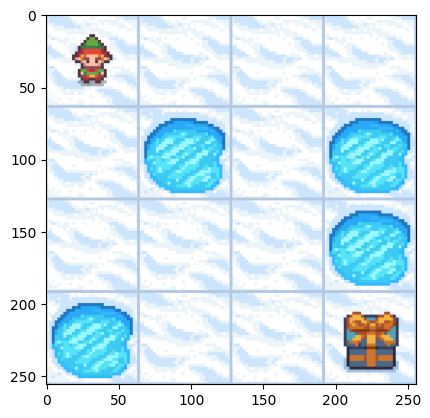

In [ ]:
env.reset()
frame = env.render()
plt.imshow(frame)

In [ ]:
no_of_states = int(env.observation_space.n)
no_of_actions = int(env.action_space.n)
print(f'Number of states = {no_of_states} and Number of actions = {no_of_actions}')

Number of states = 16 and Number of actions = 4


In [ ]:
q_values = np.zeros((no_of_states,no_of_actions))
q_values

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
def policy(state,epsilon=0):
  if np.random.random() < epsilon:
    action = int(np.random.choice(np.arange(0,no_of_actions)))
  else:
    action = (np.argmax(q_values[state]))
  return action


In [ ]:
def on_policy_monte_carlo(q_values,policy,episodes,discount_factor,epsilon):

  dictionary = {}
  for episode in tqdm.tqdm(range(1,episodes+1)): # Changed tqdm to tqdm.tqdm
    state , _= env.reset()
    terminated = False
    truncated = False
    episode_history = []
    return_for_episode = 0
    while(terminated == False and truncated == False):

      action = policy(state,epsilon)
      next_state , reward , terminated , truncated , _ = env.step(action)
      episode_history.append([state,action,reward])
      state = next_state

    for state_t,action_t,reward_t in reversed(episode_history):
      return_for_episode = reward_t + discount_factor * return_for_episode

      if (state_t,action_t) not in dictionary:
        dictionary[(state_t,action_t)] =[]

      dictionary[(state_t,action_t)].append(return_for_episode)
      q_values[state_t,action_t] = np.mean(dictionary[(state_t,action_t)])

In [ ]:
on_policy_monte_carlo(q_values,policy,5000,0.99,0.5)

100%|██████████| 5000/5000 [00:10<00:00, 486.67it/s]


In [ ]:
q_values

array([[0.03125936, 0.26265126, 0.08479163, 0.1101342 ],
       [0.06719251, 0.        , 0.21358081, 0.24341094],
       [0.06836543, 0.36643109, 0.16563573, 0.1932918 ],
       [0.2044886 , 0.        , 0.0542791 , 0.13139251],
       [0.05705376, 0.38397625, 0.        , 0.17787167],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.68155574, 0.        , 0.29586814],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1117419 , 0.        , 0.5192949 , 0.26676654],
       [0.32828535, 0.65606955, 0.6820974 , 0.        ],
       [0.53717314, 0.91638919, 0.        , 0.49024255],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.74530555, 0.90895143, 0.5682894 ],
       [0.72053588, 0.89889479, 1.        , 0.75136702],
       [0.        , 0.        , 0.        , 0.        ]])

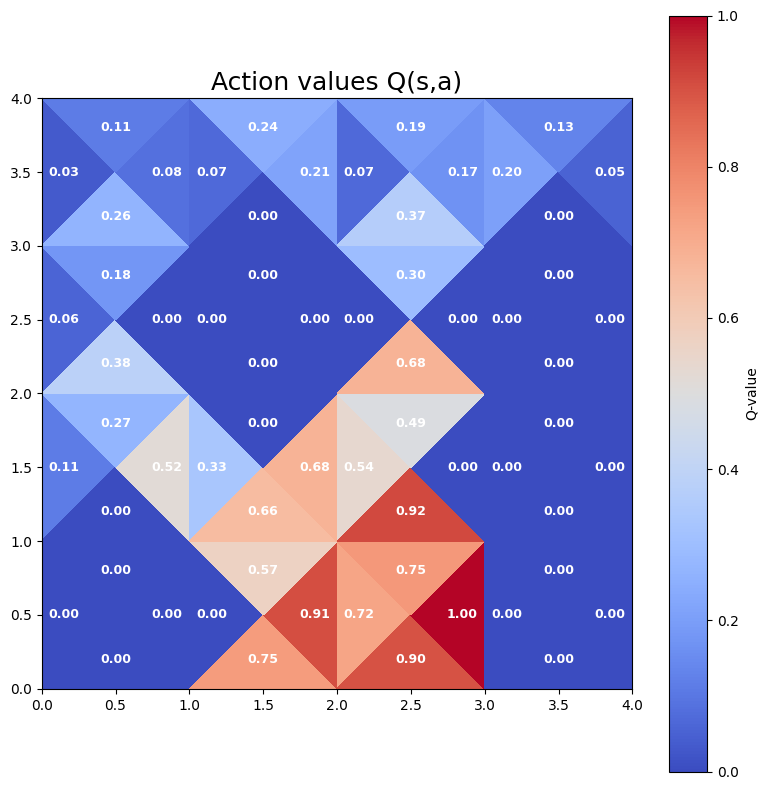

In [ ]:
plot_action_values(q_values)


In [ ]:
policy = create_greedy_policy(q_values)
video = test_agent(env, policy, episodes=5)
video

Success Rate: 5/5 (100.0%)
Average Reward: 1.00 (+/- 0.00)
Average Episode Length: 6.00 (+/- 0.00)
